# (02) Combine $\beta$ fits

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

## Copy fits to tmp dir

In [2]:
fits = [
    'fixate1_nf-420_beta-0.6_(2023_04_30,20:36)',
    'fixate1_nf-420_beta-0.7_(2023_04_30,21:40)',
    'fixate1_nf-420_beta-1e+01_(2023_04_30,22:48)',
    
    'fixate1_nf-420_beta-1.0_(2023_04_29,19:41)',
    'fixate1_nf-420_beta-0.5_(2023_04_30,20:05)',
    'fixate1_nf-420_beta-0.2_(2023_04_30,21:37)',
    'fixate1_nf-420_(2023_04_27,20:20)',
    'fixate1_nf-420_beta-0.1_(2023_04_29,22:01)',
    'fixate1_nf-420_beta-0.01_(2023_04_30,07:42)',
]
copy_fits(fits, pjoin(tmp_dir, 'results_combined'))

## Load & analyze

In [3]:
df = []
perf = {}
for fit_name in fits:
    _df = f"summary_{fit_name}.df"
    _df = pjoin(tmp_dir, 'results_combined', _df)
    _df = pd.read_pickle(_df)
    k = _df['beta'].unique().item()
    perf[k] = _df.perf.values
    df.append(_df)
df = pd.concat(df)
print({k: len(v) for k, v in perf.items()})

{0.6: 141, 0.7: 141, 10.0: 141, 1.0: 141, 0.5: 141, 0.2: 141, 0.15: 141, 0.1: 141, 0.01: 141}

In [4]:
grouped_by_cat = collections.defaultdict(list)
grouped_by_nobj = collections.defaultdict(list)
grouped_by_beta = collections.defaultdict(list)

for sim in df['category'].unique():
    cat, n = sim[:-1], int(sim[-1])
    grouped_by_cat[cat].append(n)
    grouped_by_nobj[n].append(cat)
    
for beta in sorted(df['beta'].unique()):
    cat = df.loc[df['beta'] == beta, 'category']
    grouped_by_beta[beta].extend(list(cat.unique()))

grouped_by_cat = dict(sorted(grouped_by_cat.items()))
grouped_by_nobj = dict(sorted(grouped_by_nobj.items()))
grouped_by_beta = dict(sorted(grouped_by_beta.items()))

print(grouped_by_cat)
print(grouped_by_nobj)
print(grouped_by_beta)

{'fixate': [1]}

{1: ['fixate']}

{
    0.01: ['fixate1'],
    0.1: ['fixate1'],
    0.15: ['fixate1'],
    0.2: ['fixate1'],
    0.5: ['fixate1'],
    0.6: ['fixate1'],
    0.7: ['fixate1'],
    1.0: ['fixate1'],
    10.0: ['fixate1']
}

In [5]:
pal = sns.color_palette('pastel', n_colors=len(grouped_by_beta))
pal = {beta: c for beta, c in zip(grouped_by_beta, pal)}

## More plots

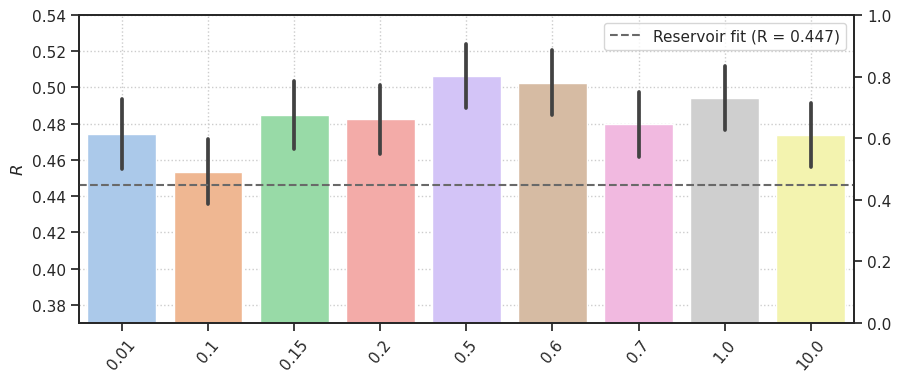

In [6]:
# HIDE CODE


fig, ax = create_figure(1, 1, (10, 4))
sns.barplot(
    data=df,
    x='beta',
    y='perf',
    hue='beta',
    palette=pal,
    errorbar='se',
    dodge=False,
    ax=ax,
)
ax.get_legend().remove()
ax.set(xlabel='', ylabel=r'$R$', ylim=(0.37, 0.54))
ax.tick_params(axis='x', rotation=50)
ax.grid()

axtwix = ax.twinx()
res_r = 0.447
axtwix.axhline(res_r, color='dimgrey', ls='--', label=f'Reservoir fit (R = {res_r})')
axtwix.legend()

plt.show()

## Get df best

In [7]:
df_best = best_fits(df)

inds = df_best['perf_best'].argsort()[::-1]
df_best.iloc[inds[:20]]

,index,category,nf,beta,root,expt,cell,max_perf,log_alpha,best_lag,perf_best,perf_worst,perf_mu,perf_sd,%+,%-
124,124,fixate1,420,0.20,YUWEI,ytu029,4,0.935583,5.0,3,0.919395,0.845404,0.876605,0.022994,4.881387,-3.559199
42,42,fixate1,420,0.01,YUWEI,clu209,1,0.923722,0.0,3,0.906522,0.772631,0.865783,0.047920,4.705478,-10.759243
29,29,fixate1,420,0.50,YUWEI,clu120,0,0.967720,5.0,3,0.896783,0.709577,0.840219,0.055855,6.732087,-15.548545
23,23,fixate1,420,0.20,YUWEI,clu104,0,0.980831,6.0,4,0.883021,0.629269,0.785163,0.084816,12.463458,-19.854985
69,69,fixate1,420,0.50,YUWEI,clu267,4,0.979806,-2.0,4,0.874280,0.757707,0.833232,0.040937,4.926301,-9.064154
28,28,fixate1,420,0.15,YUWEI,clu116,0,0.835483,1.0,1,0.868036,0.758685,0.821377,0.040170,5.680575,-7.632549
51,51,fixate1,420,0.01,YUWEI,clu221,3,0.900849,5.0,5,0.862644,0.760248,0.824555,0.034596,4.619389,-7.799035
72,72,fixate1,420,0.20,YUWEI,clu267,7,0.955361,0.0,4,0.861317,0.528240,0.763733,0.113881,12.777314,-30.834379
67,67,fixate1,420,0.01,YUWEI,clu267,1,0.944895,-1.0,7,0.855885,0.568380,0.750958,0.079982,13.972328,-24.312694
19,19,fixate1,420,0.50,YUWEI,clu090,0,0.990020,2.0,2,0.840114,0.745578,0.781968,0.026332,7.435799,-4.653630


In [8]:
inds = df_best['%+'].argsort()[::-1]
df_best.iloc[inds[:10]]

,index,category,nf,beta,root,expt,cell,max_perf,log_alpha,best_lag,perf_best,perf_worst,perf_mu,perf_sd,%+,%-
34,34,fixate1,420,1.0,YUWEI,clu145,0,0.593791,-8.0,1,0.697875,-0.002190,0.218644,0.209714,219.183185,-101.001824
130,130,fixate1,420,0.1,YUWEI,ytu029,12,0.324496,0.0,6,0.522884,0.030094,0.262122,0.176726,99.481345,-88.518920
31,31,fixate1,420,10.0,YUWEI,clu131,0,0.843686,-4.0,9,0.402113,0.074209,0.205623,0.120442,95.558242,-63.910044
66,66,fixate1,420,10.0,YUWEI,clu229,11,0.716168,5.0,10,0.311350,0.030648,0.164001,0.102328,89.846867,-81.312145
84,84,fixate1,420,0.5,YUWEI,clu292,13,0.871889,6.0,12,0.525686,-0.077970,0.312420,0.183654,68.262647,-124.956722
87,87,fixate1,420,0.5,YUWEI,clu293,3,0.828781,12.0,12,0.459803,0.153428,0.273760,0.085113,67.958709,-43.955245
68,68,fixate1,420,10.0,YUWEI,clu267,3,0.943782,1.0,3,0.255560,0.069158,0.163659,0.071827,56.154446,-57.742338
94,94,fixate1,420,1.0,YUWEI,clu293,10,0.956023,-2.0,3,0.507137,0.175525,0.329072,0.093440,54.111122,-46.660751
63,63,fixate1,420,0.1,YUWEI,clu227,0,0.857890,3.0,4,0.399256,0.180960,0.261352,0.059357,52.765561,-30.760074
127,127,fixate1,420,10.0,YUWEI,ytu029,7,0.502646,-2.0,10,0.803684,0.310600,0.527486,0.143109,52.361170,-41.116867


In [9]:
sorted_data = sorted(zip(
    df_best['perf_best'],
    df_best['perf_mu'],
    df_best['perf_sd'],
), key=lambda x: x[0])
sorted_data = list(map(
    lambda t: np.array(t),
    zip(*sorted_data),
))

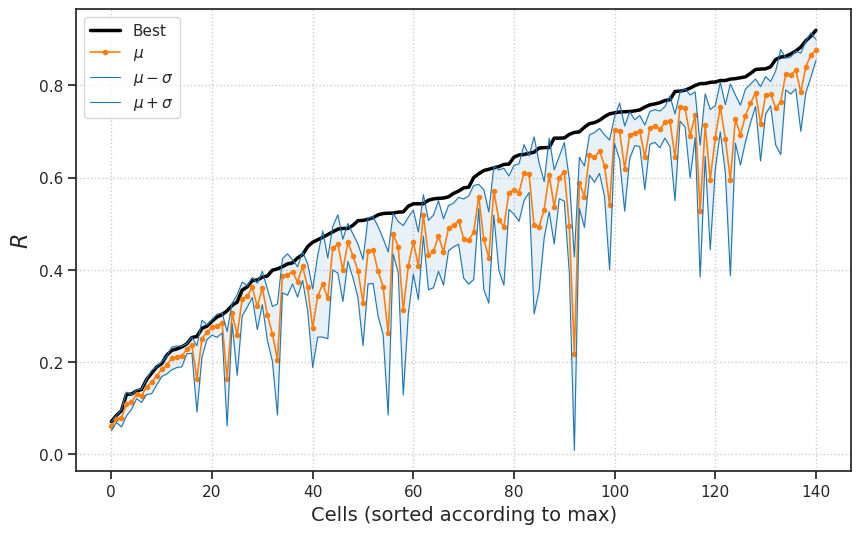

In [10]:
# HIDE CODE


fig, ax = create_figure(1, 1, (10, 6))
ax.plot(sorted_data[0], lw=2.5, color='k', label='Best')
ax.plot(sorted_data[1], lw=1.2, color='C1', marker='.', label=r'$\mu$')

lower = sorted_data[1] - sorted_data[2]
higher = sorted_data[1] + sorted_data[2]
ax.plot(lower, lw=0.8, color='C0', label=r'$\mu - \sigma$')
ax.plot(higher, lw=0.8, color='C0', label=r'$\mu + \sigma$')
ax.fill_between(
    x=range(len(df_best)),
    y1=lower,
    y2=higher,
    color='C0',
    alpha=0.1,
)
ax.set_xlabel('Cells (sorted according to max)', fontsize=14)
ax.set_ylabel(r'$R$', fontsize=16)
ax.locator_params(axis='y', nbins=10)
ax.legend()
ax.grid()
plt.show()

### Pie chart

In [11]:
labels, vals = zip(*collections.Counter(
    df_best['beta']).most_common())
vals = [100 * e / sum(vals) for e in vals]

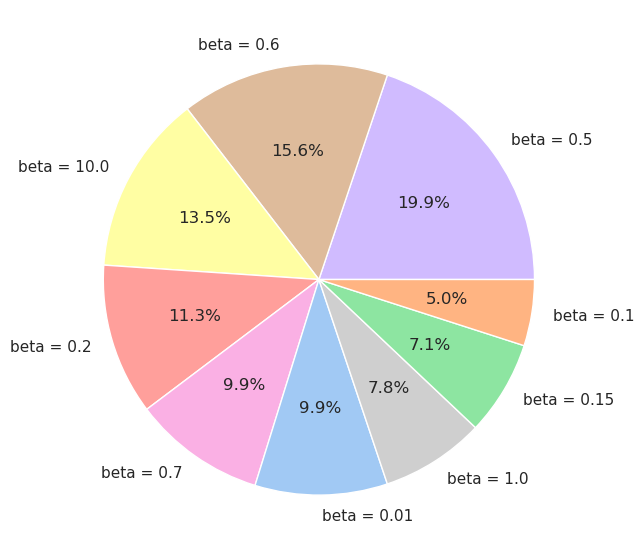

In [12]:
fig, ax = create_figure(1, 1, (8, 7))
ax.pie(
    x=vals,
    labels=[f"beta = {e}" for e in labels],
    colors=[pal[e] for e in labels],
    autopct='%0.1f%%',
)
plt.show()

### Summary of results

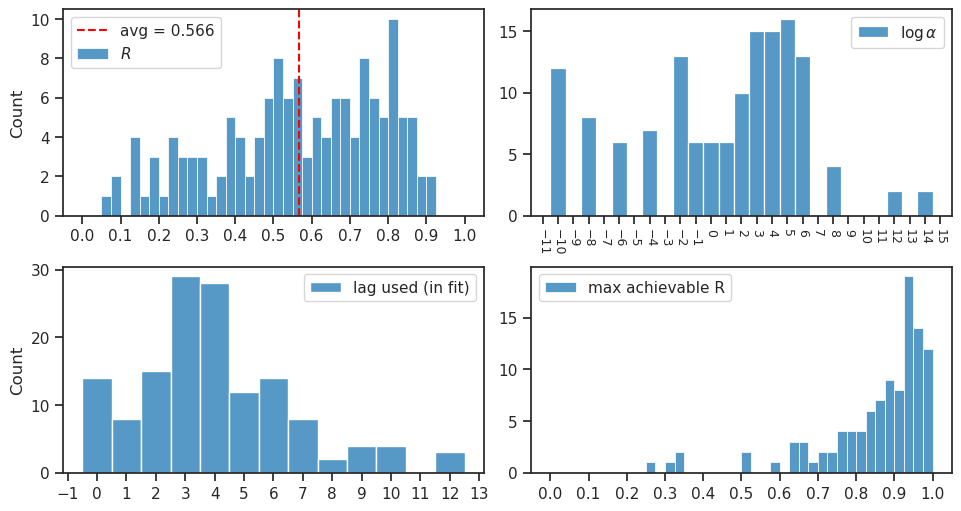

In [13]:
show_neural_results(df_best, 'perf_best');

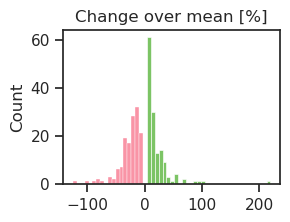

In [14]:
_pal = sns.color_palette('husl')
_pal = {'+': _pal[2], '-': _pal[0]}

fig, ax = create_figure(1, 1, (2.8, 2))
sns.histplot(df_best['%+'], color=_pal['+'], ax=ax)
sns.histplot(df_best['%-'], color=_pal['-'], ax=ax)
ax.set(xlabel='', title='Change over mean [%]')
plt.show()

In [15]:
val = np.concatenate([df_best['%+'].values, df_best['%-'].values])
label = ['+'] * len(df_best['%+']) + ['-'] * len(df_best['%-'])

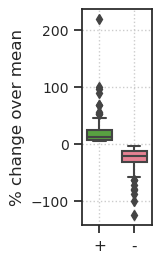

In [16]:
fig, ax = create_figure(1, 1, (0.9, 2.8))

sns.boxplot(
    data=pd.DataFrame({'val': val, 'label': label}),
    y='val',
    x='label',
    palette=_pal,
    width=0.70,
    ax=ax,
)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel='', ylabel='% change over mean')
ax.grid()
plt.show()

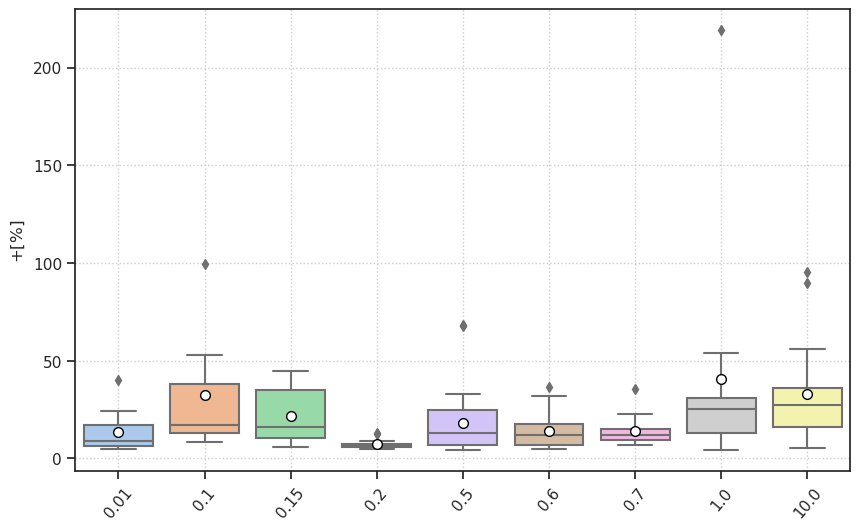

In [17]:
# HIDE CODE


props_mean = {
    'marker': 'o',
    'markerfacecolor': 'white',
    'markeredgecolor': 'k',
    'markersize': 7,
    'alpha': 1.0,
}

fig, ax = create_figure(1, 1, (10, 6))
sns.boxplot(
    data=df_best,
    y='%+',
    x='beta',
    hue='beta',
    order=pal,
    palette=pal,
    dodge=False,
    showmeans=True,
    meanprops=props_mean,
    ax=ax,
)
ax.set(xlabel='', ylabel=r'$+ [\%]$')
ax.tick_params(axis='x', rotation=50)
ax.get_legend().remove()
ax.grid()
plt.show()

In [18]:
categories = list(df['category'].unique())
df_test = best_fits(df, categories)
perf_best = df_test['perf_best'].mean()
perf_best

0.5656327766724834

In [19]:
reduced_perf_objs = {}
for n_obj in grouped_by_nobj:
    _df = best_fits(df, [e for e in categories if int(e[-1]) == n_obj])
    reduced_perf_objs[n_obj] = _df['perf_best'].mean()
print(reduced_perf_objs)

{1: 0.5656327766724834}

In [ ]:
reduced_perf = {}
for cat in grouped_by_cat:
    _df = best_fits(df, [e for e in categories if cat not in e])
    reduced_perf[cat] = _df['perf_best'].mean()
print(reduced_perf)

In [ ]:
fig, axes = create_figure(1, 2, (4.5, 2), sharey='all', layout='constrained')

axes[0].plot(list(reduced_perf.values()), marker='o')
axes[0].set(xticks=range(len(reduced_perf)), xticklabels=list(reduced_perf), ylabel=r'$R$')
axes[0].tick_params(axis='x', rotation=50)
axes[0].grid()

axes[1].plot(list(reduced_perf_objs.values()), marker='o')
axes[1].set(xticks=range(len(reduced_perf_objs)), xticklabels=list(reduced_perf_objs), xlabel='# Objs')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid()

plt.show()

## Permutation test

In [20]:
%%time

def statistic(a, b):
    return np.mean(a - b)


t = PrettyTable()
t.field_names = [
    'Beta #1',
    'Beta #2',
    'Statistic',
    'p-val',
    'Significant?',
]

pvals = {}
looper = itertools.combinations(
    list(df['beta'].unique()), 2)
for b1, b2 in looper:
    _data = (
        df.loc[df['beta'] == b1, 'perf'].values,
        df.loc[df['beta'] == b2, 'perf'].values,
    )
    test = sp_stats.permutation_test(
        data=_data,
        n_resamples=int(1e5),
        permutation_type='samples',
        alternative='two-sided',
        statistic=statistic,
        random_state=0,
    )
    pvals[(b1, b2)] = test.pvalue
    t.add_row([
        b1,
        b2,
        np.round(test.statistic, 2),
        f"{test.pvalue:0.2g}",
        test.pvalue < 0.05,
    ])

CPU times: user 20min 54s, sys: 57.8 s, total: 21min 51s
Wall time: 21min 52s


In [21]:
print(t)

+---------+---------+-----------+---------+--------------+
| Beta #1 | Beta #2 | Statistic |  p-val  | Significant? |
+---------+---------+-----------+---------+--------------+
|   0.6   |   0.7   |    0.02   | 0.00028 |     True     |
|   0.6   |   10.0  |    0.03   | 0.00058 |     True     |
|   0.6   |   1.0   |    0.01   |   0.26  |    False     |
|   0.6   |   0.5   |    -0.0   |   0.51  |    False     |
|   0.6   |   0.2   |    0.02   |  0.0034 |     True     |
|   0.6   |   0.15  |    0.02   |  0.016  |     True     |
|   0.6   |   0.1   |    0.05   |  2e-05  |     True     |
|   0.6   |   0.01  |    0.03   | 0.00026 |     True     |
|   0.7   |   10.0  |    0.01   |   0.54  |    False     |
|   0.7   |   1.0   |   -0.01   |   0.1   |    False     |
|   0.7   |   0.5   |   -0.03   | 0.00016 |     True     |
|   0.7   |   0.2   |    -0.0   |   0.72  |    False     |
|   0.7   |   0.15  |    -0.0   |   0.51  |    False     |
|   0.7   |   0.1   |    0.03   |  0.0013 |     True     |
|   0.7   |   0.01  |    0.01   |   0.52  |    False     |
|   10.0  |   1.0   |   -0.02   |  0.0095 |     True     |
|   10.0  |   0.5   |   -0.03   |  0.0003 |     True     |
|   10.0  |   0.2   |   -0.01   |   0.4   |    False     |
|   10.0  |   0.15  |   -0.01   |   0.31  |    False     |
|   10.0  |   0.1   |    0.02   |  0.083  |    False     |
|   10.0  |   0.01  |    -0.0   |   0.98  |    False     |
|   1.0   |   0.5   |   -0.01   |   0.16  |    False     |
|   1.0   |   0.2   |    0.01   |   0.25  |    False     |
|   1.0   |   0.15  |    0.01   |   0.33  |    False     |
|   1.0   |   0.1   |    0.04   |  2e-05  |     True     |
|   1.0   |   0.01  |    0.02   |  0.048  |     True     |
|   0.5   |   0.2   |    0.02   |  0.001  |     True     |
|   0.5   |   0.15  |    0.02   |  0.0048 |     True     |
|   0.5   |   0.1   |    0.05   |  2e-05  |     True     |
|   0.5   |   0.01  |    0.03   | 0.00042 |     True     |
|   0.2   |   0.15  |    -0.0   |   0.73  |    False     |
|   0.2   |   0.1   |    0.03   | 0.00072 |     True     |
|   0.2   |   0.01  |    0.01   |   0.32  |    False     |
|   0.15  |   0.1   |    0.03   | 0.00052 |     True     |
|   0.15  |   0.01  |    0.01   |   0.19  |    False     |
|   0.1   |   0.01  |   -0.02   |  0.015  |     True     |
+---------+---------+-----------+---------+--------------+

In [22]:
print(pvals)

{
    (0.6, 0.7): 0.00027999720002799973,
    (0.6, 10.0): 0.0005799942000579994,
    (0.6, 1.0): 0.2627573724262757,
    (0.6, 0.5): 0.5076949230507695,
    (0.6, 0.2): 0.0033999660003399966,
    (0.6, 0.15): 0.016179838201617985,
    (0.6, 0.1): 1.999980000199998e-05,
    (0.6, 0.01): 0.0002599974000259997,
    (0.7, 10.0): 0.5447345526544735,
    (0.7, 1.0): 0.10427895721042789,
    (0.7, 0.5): 0.00015999840001599985,
    (0.7, 0.2): 0.7220727792722073,
    (0.7, 0.15): 0.5079749202507975,
    (0.7, 0.1): 0.0013199868001319986,
    (0.7, 0.01): 0.5245747542524575,
    (10.0, 1.0): 0.009479905200947991,
    (10.0, 0.5): 0.0002999970000299997,
    (10.0, 0.2): 0.4018159818401816,
    (10.0, 0.15): 0.3089369106308937,
    (10.0, 0.1): 0.08323916760832392,
    (10.0, 0.01): 0.977910220897791,
    (1.0, 0.5): 0.16037839621603783,
    (1.0, 0.2): 0.24831751682483175,
    (1.0, 0.15): 0.33085669143308566,
    (1.0, 0.1): 1.999980000199998e-05,
    (1.0, 0.01): 0.047759522404775955,
    (0.5, 0.2): 0.000999990000099999,
    (0.5, 0.15): 0.004759952400475995,
    (0.5, 0.1): 1.999980000199998e-05,
    (0.5, 0.01): 0.0004199958000419996,
    (0.2, 0.15): 0.7339526604733952,
    (0.2, 0.1): 0.0007199928000719992,
    (0.2, 0.01): 0.31715682843171566,
    (0.15, 0.1): 0.0005199948000519994,
    (0.15, 0.01): 0.18721812781872182,
    (0.1, 0.01): 0.015459845401545984
}